In [66]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

### 1. Loading up the Images

In [67]:
# Set paths
train_dir = "/content/drive/MyDrive/SmartDustbin/dataset/train"
test_dir = "/content/drive/MyDrive/SmartDustbin/dataset/test"


###2. Initializing Parameters

In [68]:
# Parameters
batch_size = 32
img_height = 150
img_width = 150

###3. Generating Data for Training and Testing

In [69]:
# Data Generators for training and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1573 images belonging to 4 classes.
Found 414 images belonging to 4 classes.


###4. Building CNN Model

####A. Creating CNN model without adding pooling layers




In [72]:
# Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (5, 5), strides = 4, activation='relu', padding = 'valid', input_shape=(img_height, img_width, 3)),
    layers.Conv2D(64, (5, 5), strides =4, padding = 'valid',  activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(4, activation='softmax')  # Assuming 4 classes: plastic, metal, glass, paper
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 37, 37, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 9, 9, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 5184)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │       1,327,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,382,084 (5.27 MB)

 Trainable params: 1,382,084 (5.27 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [75]:
# Train the model
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 346ms/step - accuracy: 0.2957 - loss: 1.4149 - val_accuracy: 0.2440 - val_loss: 1.3963
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 293ms/step - accuracy: 0.2735 - loss: 1.3735 - val_accuracy: 0.2440 - val_loss: 1.3929
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 298ms/step - accuracy: 0.3232 - loss: 1.3602 - val_accuracy: 0.2585 - val_loss: 1.3731
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 372ms/step - accuracy: 0.3307 - loss: 1.3385 - val_accuracy: 0.3551 - val_loss: 1.3135
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 392ms/step - accuracy: 0.3739 - loss: 1.2714 - val_accuracy: 0.3140 - val_loss: 1.3590
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 479ms/step - accuracy: 0.3888 - loss: 1.2961 - val_accuracy: 0.2995 - val_loss: 1.3357
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 331ms/step - accuracy: 0.3952 - loss: 1.2473 - val_accuracy: 0.4300 - val_loss: 1.2217
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 461ms/step - accuracy: 0.3922 - loss: 1.2886 - val_accuracy: 0.415

In [76]:
# Evaluate the model
loss, accuracy = model.evaluate(test_data)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.4258 - loss: 1.2256
Test Loss: 1.1458364725112915
Test Accuracy: 0.4855072498321533


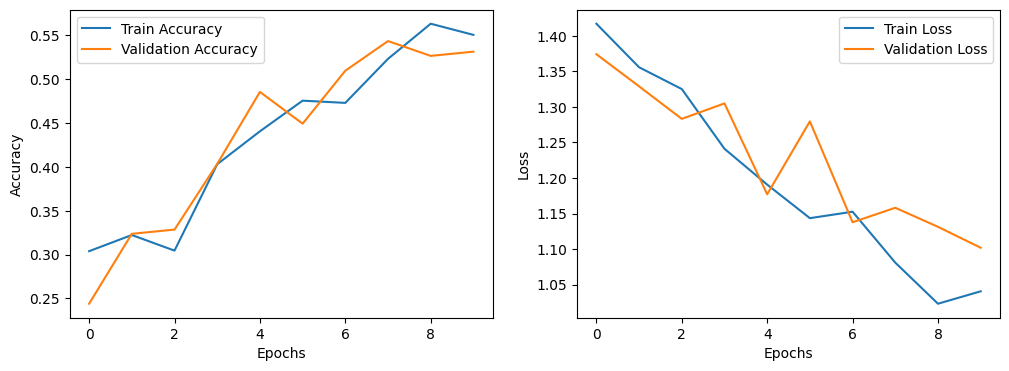

In [42]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
# Classification Report and Confusion Matrix
y_pred = np.argmax(model.predict(test_data), axis=-1)
y_true = test_data.classes

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(test_data.class_indices.keys())))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step
Classification Report:
              precision    recall  f1-score   support

       glass       0.40      0.70      0.51       101
       metal       0.58      0.50      0.54       106
       paper       0.65      0.54      0.59       101
     plastic       0.69      0.39      0.50       106

    accuracy                           0.53       414
   macro avg       0.58      0.53      0.53       414
weighted avg       0.58      0.53      0.53       414

Confusion Matrix:
[[71 20  3  7]
 [26 53 20  7]
 [33  9 55  4]
 [48 10  7 41]]


####B.Creating CNN model by adding pooling layers

In [77]:
# Build the CNN Model
model_2 = models.Sequential([
    layers.Conv2D(32, (3, 3), strides = 2, activation='relu', padding = 'same', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size=(3, 3), strides =2),
    layers.Conv2D(64, (3, 3), strides =2, padding = 'valid',  activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3), strides =2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(4, activation='softmax')  # Assuming 4 classes: plastic, metal, glass, paper
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
model_2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 75, 75, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 18, 18, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,069,252 (4.08 MB)

 Trainable params: 1,069,252 (4.08 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [80]:
history = model_2.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    verbose=1
)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 392ms/step - accuracy: 0.3278 - loss: 1.3911 - val_accuracy: 0.3720 - val_loss: 1.2486
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 405ms/step - accuracy: 0.4442 - loss: 1.2095 - val_accuracy: 0.3188 - val_loss: 1.3022
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 319ms/step - accuracy: 0.4631 - loss: 1.1588 - val_accuracy: 0.3865 - val_loss: 1.3458
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 290ms/step - accuracy: 0.5437 - loss: 1.0939 - val_accuracy: 0.4710 - val_loss: 1.1607
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 291ms/step - accuracy: 0.5855 - loss: 0.9703 - val_accuracy: 0.4614 - val_loss: 1.3333
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 287ms/step - accuracy: 0.5594 - loss: 1.0232 - val_accuracy: 0.4710 - val_loss: 1.3156
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 291ms/step - accuracy: 0.6236 - loss: 0.9172 - val_accuracy: 0.5217 - val_loss: 1.0751
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 301ms/step - accuracy: 0.6363 - loss: 0.8773 - val_accu

In [81]:
# Evaluate the model
loss, accuracy = model_2.evaluate(test_data)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.5179 - loss: 1.2219
Test Loss: 1.0158315896987915
Test Accuracy: 0.5917874574661255


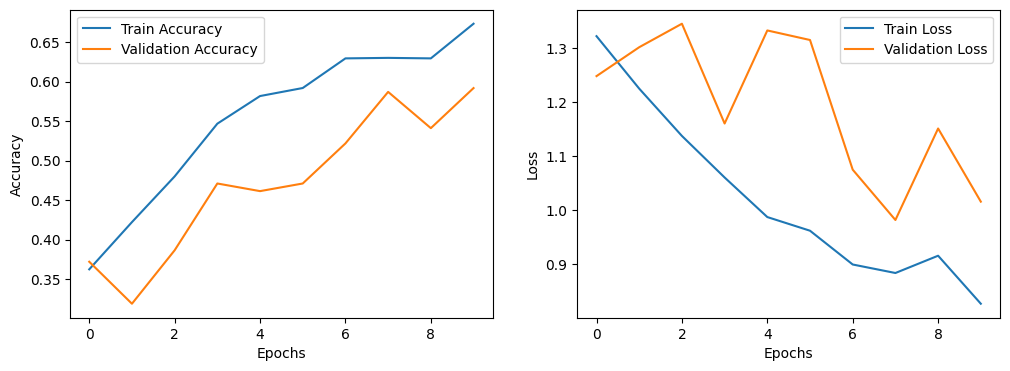

In [82]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [83]:
# Classification Report and Confusion Matrix
y_pred = np.argmax(model_2.predict(test_data), axis=-1)
y_true = test_data.classes

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(test_data.class_indices.keys())))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step
Classification Report:
              precision    recall  f1-score   support

       glass       0.58      0.38      0.46       101
       metal       0.62      0.68      0.65       106
       paper       0.55      0.84      0.66       101
     plastic       0.65      0.47      0.55       106

    accuracy                           0.59       414
   macro avg       0.60      0.59      0.58       414
weighted avg       0.60      0.59      0.58       414

Confusion Matrix:
[[38 32 20 11]
 [ 8 72 17  9]
 [ 4  5 85  7]
 [15  8 33 50]]


####C. Creating CNN model to improve Accuracy and adding Depth

In [116]:
# Parameters
batch_size = 32
img_height_changed = 256
img_width_changed = 256

In [117]:
# Data Generators for training and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height_changed, img_width_changed),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height_changed, img_width_changed),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1573 images belonging to 4 classes.
Found 414 images belonging to 4 classes.


In [120]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height_changed, img_width_changed, 3))
base_model.trainable = False  # Freeze the base model

model_3 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout to reduce overfitting
    layers.Dense(4, activation='softmax')  # 4 classes
])

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


<ipython-input-120-4c253b2622df>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height_changed, img_width_changed, 3))


In [121]:
model_3.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 8, 8, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [123]:
history = model_3.fit(
    train_data,
    validation_data=test_data,
    epochs=25,
    verbose=1
)

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 853ms/step - accuracy: 0.5415 - loss: 1.0970 - val_accuracy: 0.7319 - val_loss: 0.6581
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 584ms/step - accuracy: 0.7589 - loss: 0.6167 - val_accuracy: 0.7923 - val_loss: 0.5059
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 567ms/step - accuracy: 0.7549 - loss: 0.6005 - val_accuracy: 0.8140 - val_loss: 0.4858
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 573ms/step - accuracy: 0.7904 - loss: 0.5134 - val_accuracy: 0.8285 - val_loss: 0.4721
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 567ms/step - accuracy: 0.8225 - loss: 0.5046 - val_accuracy: 0.8430 - val_loss: 0.4301
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 48s 706ms/step - accuracy: 0.8248 - loss: 0.4306 - val_accuracy: 0.8671 - val_loss: 0.4074
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 622ms/step - accuracy: 0.8322 - loss: 0.4382 - val_accuracy: 0.8575 - val_loss: 0.4006
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 573ms/step - accuracy: 0.8381 - loss: 0.4220 - val_accu

In [124]:
# Evaluate the model
loss, accuracy = model_3.evaluate(test_data)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - accuracy: 0.8871 - loss: 0.3149
Test Loss: 0.33616745471954346
Test Accuracy: 0.8913043737411499


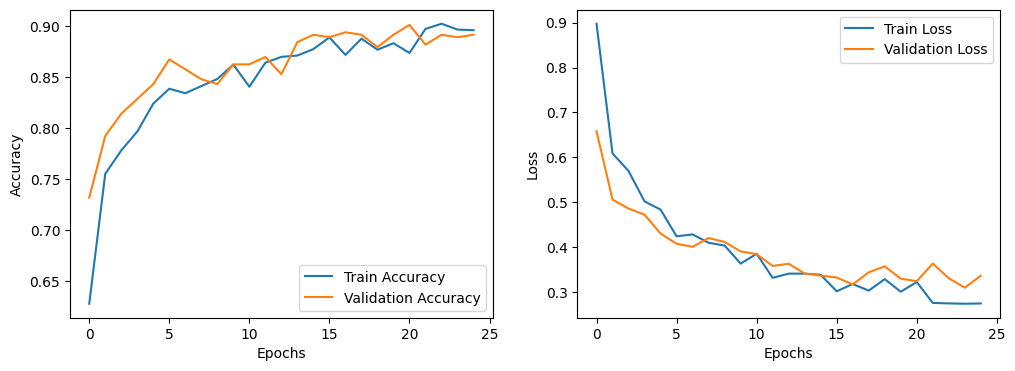

In [125]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [126]:
# Classification Report and Confusion Matrix
y_pred = np.argmax(model_3.predict(test_data), axis=-1)
y_true = test_data.classes

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(test_data.class_indices.keys())))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 399ms/step
Classification Report:
              precision    recall  f1-score   support

       glass       0.82      0.88      0.85       101
       metal       0.91      0.93      0.92       106
       paper       0.93      0.97      0.95       101
     plastic       0.91      0.78      0.84       106

    accuracy                           0.89       414
   macro avg       0.89      0.89      0.89       414
weighted avg       0.89      0.89      0.89       414

Confusion Matrix:
[[89  5  2  5]
 [ 3 99  2  2]
 [ 1  1 98  1]
 [16  4  3 83]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Maximum Probability:  0.9221031
Classified: metal


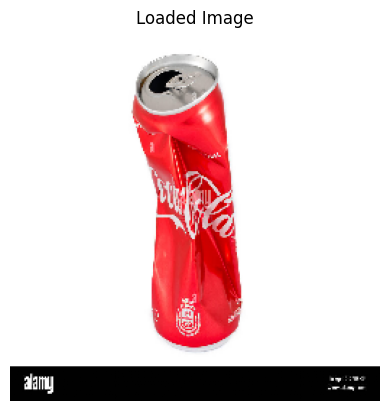

In [131]:
from keras.preprocessing import image

img_path = '/content/coke.jpg'

img = image.load_img(img_path, target_size=(256, 256))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model_3.predict(img[np.newaxis, ...])

labels = list(test_data.class_indices.keys())

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Maximum Probability:  0.5892035
Classified: plastic


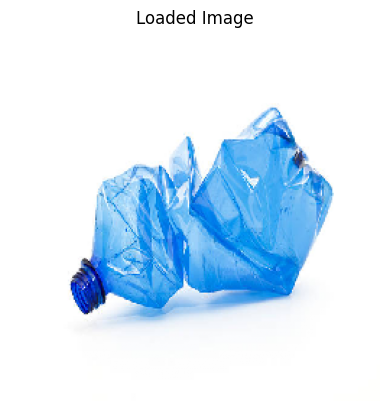

In [132]:
from keras.preprocessing import image

img_path = '/content/plastic.jpg'

img = image.load_img(img_path, target_size=(256, 256))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model_3.predict(img[np.newaxis, ...])

labels = list(test_data.class_indices.keys())

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Maximum Probability:  0.98034316
Classified: glass


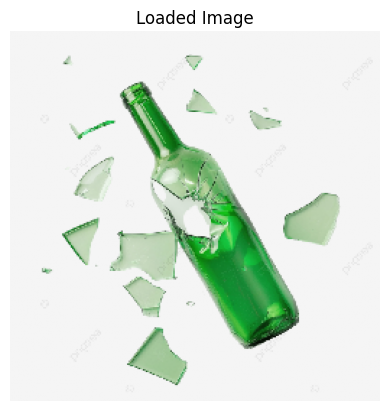

In [134]:
from keras.preprocessing import image

img_path = '/content/broken_glass.png'

img = image.load_img(img_path, target_size=(256, 256))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model_3.predict(img[np.newaxis, ...])

labels = list(test_data.class_indices.keys())

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Maximum Probability:  0.99904376
Classified: paper


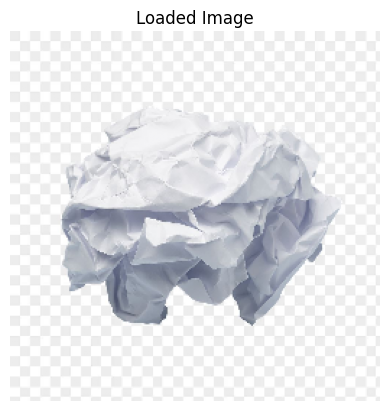

In [139]:
from keras.preprocessing import image

img_path = '/content/paperrrr.jpg'

img = image.load_img(img_path, target_size=(256, 256))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model_3.predict(img[np.newaxis, ...])

labels = list(test_data.class_indices.keys())

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)

